In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats

df = pd.read_excel("product_data.xlsx")
df.head()

,Manufacturer,Screen Size,Motion Rate,Pixel,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=49""","size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,0,0,430,16041
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,0,0,1,535,16364
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,0,0,1,0,0,0,495,15998
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,0,0,1,0,0,1,540,16214
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,0,0,1,0,0,545,16343


In [3]:
# Regressing based on Yearly Units Sold
y = df['Yearly units sold in US']
x = df.drop(['Manufacturer', 'Screen Size', 'Motion Rate','Pixel' ,'Yearly units sold in US'], axis = 1)

In [4]:
model = LinearRegression().fit(x,y)

In [5]:
var = x.columns.tolist() # List of reputation dimensions
coef = model.coef_.tolist() # redistributeed reputation value

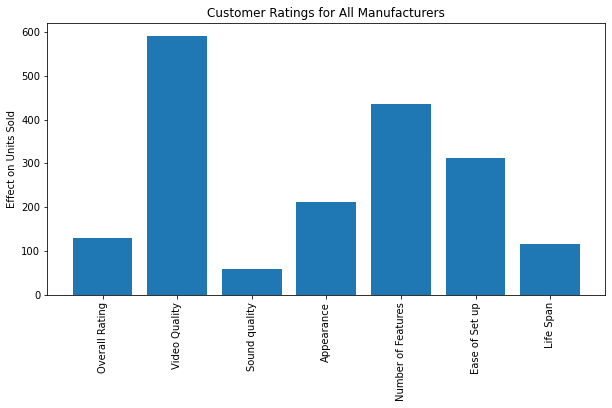

In [6]:
import matplotlib.pyplot as plt
# use a bar chart to display relative impact of reputation dimensions
plt.figure(figsize = (10, 5))
plt.bar(var[0:7], coef[0:7])
plt.title("Customer Ratings for All Manufacturers")
plt.ylabel('Effect on Units Sold')
plt.xticks(rotation = 90)
plt.show()

In [7]:
var.insert(0, 'Intercept')
coef.insert(0, model.intercept_)
out = pd.DataFrame({'Variable': var, 'Coefficient': coef})
print(out)

                 Variable   Coefficient
0               Intercept  10480.026174
1          Overall Rating    129.866577
2           Video Quality    590.426044
3           Sound quality     59.238484
4              Appearance    212.558897
5      Number of Features    435.987545
6          Ease of Set up    312.655093
7               Life Span    116.527290
8   Expert Overall Rating     28.479620
9                size=26"   1007.475260
10               size=32"   2002.103259
11               size=36"   6016.602939
12               size=40"   1012.322244
13               size=42"   8016.864276
14               size=46"  12524.334956
15               size=49"   -480.448968
16               size=52"  -1029.154963
17               size=55"  -1892.546678
18               size=60"  -4978.424788
19         motionrate=120    100.647587
20         motionrate=240    203.665809
21         motionrate=600    303.872318
22             Pixel=1080    355.964377
23          Selling Price     -3.049214


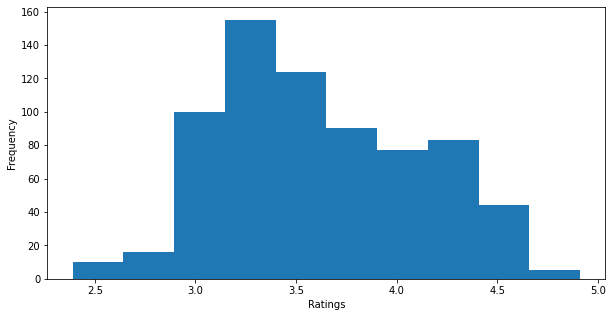

mean: 3.6196
median: 3.5200
90 percentile: 4.3600


In [8]:
df_VideoQuality = df['Video Quality']

plt.figure(figsize=(10, 5))
plt.hist(df_VideoQuality)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

print('mean: %.4f' % np.mean(df_VideoQuality))
print('median: %.4f' % np.median(df_VideoQuality))
print('90 percentile: %.4f' % np.percentile(df_VideoQuality, 90))

In [9]:
#pivot table
t = pd.pivot_table(df, values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance','Number of Features', 'Ease of Set up','Life Span'], index = ['Manufacturer'], aggfunc= np.mean)
t

,Appearance,Ease of Set up,Life Span,Number of Features,Overall Rating,Sound quality,Video Quality
Manufacturer,,,,,,,
LG,3.971932,3.601591,3.100909,4.225341,3.469545,4.209659,3.415795
Panasonic,3.586818,4.211136,4.637045,3.814205,3.945682,3.503295,4.378523
Philips,4.025114,3.209659,3.595909,2.903636,3.769545,3.889773,3.391364
Samsung,4.220114,3.883636,4.491136,4.378636,4.195568,4.204205,4.131591
Sharp,3.461023,3.191705,3.382955,3.361136,3.397614,3.633750,3.572159
Sony,3.964659,3.728977,4.102045,3.236818,4.323295,4.081591,3.906250
Toshiba,3.482841,3.403409,3.509318,3.433636,3.195341,3.110114,3.056818
Vizio,3.127045,3.400795,3.542273,3.154205,3.233864,2.992386,3.104205


In [10]:
t_panasonic = t.loc['Panasonic','Video Quality']
t_panasonic

4.378522727272728

In [11]:
my_score = stats.percentileofscore(df_VideoQuality, t_panasonic)
print('My score: %.4f' % my_score)

My score: 91.0511


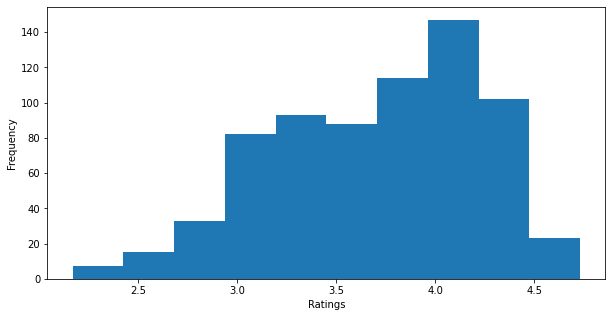

mean: 3.7031
median: 3.7800
90 percentile: 4.3000


In [12]:
df_SoundQuality = df['Sound quality']

plt.figure(figsize=(10, 5))
plt.hist(df_SoundQuality)
plt.ylabel('Frequency')
plt.xlabel('Ratings')
plt.show()

print('mean: %.4f' % np.mean(df_SoundQuality))
print('median: %.4f' % np.median(df_SoundQuality))
print('90 percentile: %.4f' % np.percentile(df_SoundQuality, 90))

In [13]:
t_panasonic_sound = t.loc['Panasonic','Sound quality']
my_score_sound = stats.percentileofscore(df_SoundQuality, t_panasonic_sound)
print('My score: %.4f' % my_score_sound)

My score: 35.3693


From the above Analysis, we can conclude that, Panasonic has outperformed it's competitors when it comes Video Quality. We can see that it exceeds the average customer rating and it is in the top 91 percentile. Hence, we can say that the company does not need to invest in the Video Quality of their television. They get highest sales due to better video quality.  

However, we see that it has a poor sound quality when comparted to it's competitors. It is well below the average when compared with it's other competitors (3.503295) < (3.7031). Infact they are in the 35 percentile score range, which means remaning 65 % of their competitors have better sound quality and ratings. If Panasonic wants to beat it's competitors, it needs to improve its sound quality. This shall increase their customers and hence increase their sales thereby increasing revenue. Hence, Panasonic, must invest in the sound quality of it's product. 

In [14]:
#pivot table
t2 = df.loc[(df['Manufacturer'] == 'Panasonic') & (df['Sound quality'] <= 3.503295)].pivot_table(values = ['Overall Rating','Video Quality', 'Sound quality', 'Appearance','Number of Features', 'Ease of Set up','Life Span'], index = ['Manufacturer','Screen Size','Motion Rate'], aggfunc= np.mean)
t2.sort_values(by=['Sound quality']).head()

Appearance  Ease of Set up  Life Span  \
Manufacturer Screen Size Motion Rate                                          
Panasonic    26          60                3.550            4.27       4.65   
             19          240               3.790            4.69       4.57   
             42          600               3.760            4.00       4.79   
             40          120               3.445            4.43       4.75   
             46          600               3.480            4.07       4.61   

                                      Number of Features  Overall Rating  \
Manufacturer Screen Size Motion Rate                                       
Panasonic    26          60                         3.92            3.88   
             19          240                        3.74            3.67   
             42          600                        3.36            4.62   
             40          120                        3.87            4.24   
             46          600                        3.31            3.58   

                                      Sound quality  Video Quality  
Manufacturer Screen Size Motion Rate                                
Panasonic    26          60                   3.100           4.45  
             19          240                  3.160           4.24  
             42          600                  3.200           4.22  
             40          120                  3.205           4.39  
             46          600                  3.250           4.46

Upon further analysis, we find the above products and their respective product aspects, which are well below Panasonic's average customer rating in Sound Quallity (3.503295). Since, we already know that Panasonic's average customer rating is at 35 percentile score, improving sound-quality and investing in the above-mentioned suggested product details would help them to improve their overall rank. This would in-turn increase sales and revenue. 

In [15]:
#Bonus Question
#Segments. 
#Generating the average price between combinations of (Screen Size, Motion, Pixel Rates) across all manufacturers. 
avg_price = pd.pivot_table(df, values = ['Selling Price'],
                       index = ['Screen Size', 'Motion Rate', 'Pixel'], aggfunc = np.mean)
avg_price.head()

Selling Price
Screen Size Motion Rate Pixel               
19          60          720          438.750
                        1080         528.750
            120         720          490.625
                        1080         546.875
            240         720          553.750

In [16]:
#Converting avg_price Pivot Table to Dataframe. 
avg_df = avg_price.reset_index()
avg_df.head()

,Screen Size,Motion Rate,Pixel,Selling Price
0,19,60,720,438.750
1,19,60,1080,528.750
2,19,120,720,490.625
3,19,120,1080,546.875
4,19,240,720,553.750


In [17]:
#Selling price
selling_df = df[['Screen Size', 'Motion Rate', 'Pixel', 'Selling Price']]
selling_df.head()

,Screen Size,Motion Rate,Pixel,Selling Price
0,19,60,720,430
1,19,60,1080,535
2,19,120,720,495
3,19,120,1080,540
4,19,240,720,545


In [18]:
#Merging Dateframes. 

df_merged = pd.merge(avg_df[['Screen Size', 'Motion Rate', 'Pixel','Selling Price']],
                     selling_df[['Screen Size', 'Motion Rate', 'Pixel', 'Selling Price']],
                     how= 'left',
                     left_on = ['Screen Size','Motion Rate', 'Pixel'],
                     right_on = ['Screen Size','Motion Rate', 'Pixel'],
                     suffixes = ['_avg', '_actual'])
df_merged.head()

,Screen Size,Motion Rate,Pixel,Selling Price_avg,Selling Price_actual
0,19,60,720,438.75,430
1,19,60,720,438.75,475
2,19,60,720,438.75,575
3,19,60,720,438.75,540
4,19,60,720,438.75,400


In [19]:
df['Price_Difference'] = df_merged['Selling Price_actual'] - df_merged['Selling Price_avg']
df.head()

,Manufacturer,Screen Size,Motion Rate,Pixel,Overall Rating,Video Quality,Sound quality,Appearance,Number of Features,Ease of Set up,...,"size=52""","size=55""","size=60""",motionrate=120,motionrate=240,motionrate=600,Pixel=1080,Selling Price,Yearly units sold in US,Price_Difference
0,LG,19,60,720,3.71,3.34,4.12,3.61,4.33,3.38,...,0,0,0,0,0,0,0,430,16041,-8.75
1,LG,19,60,1080,3.66,3.30,4.07,4.12,4.55,4.08,...,0,0,0,0,0,0,1,535,16364,36.25
2,LG,19,120,720,3.72,3.38,4.37,4.07,4.11,3.40,...,0,0,0,1,0,0,0,495,15998,136.25
3,LG,19,120,1080,3.71,3.37,4.16,4.25,4.14,3.37,...,0,0,0,1,0,0,1,540,16214,101.25
4,LG,19,240,720,3.62,3.54,4.57,4.10,4.23,3.76,...,0,0,0,0,1,0,0,545,16343,-38.75


In [20]:
# Regressing based on Yearly Units Sold
y_2 = df['Price_Difference']
x_2 = df.drop(['Manufacturer', 'Screen Size', 'Motion Rate','Pixel' ,'Price_Difference'], axis = 1)
model_2 = LinearRegression().fit(x_2,y_2)
var_2 = x_2.columns.tolist() # List of reputation dimensions
coef_2 = model_2.coef_.tolist() # redistributeed reputation value

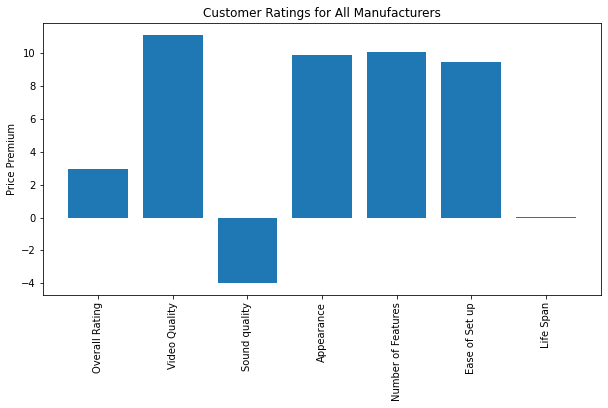

In [21]:
# use a bar chart to display relative impact of reputation dimensions
plt.figure(figsize = (10, 5))
plt.bar(var_2[0:7], coef_2[0:7])
plt.title("Customer Ratings for All Manufacturers")
plt.ylabel('Price Premium')
plt.xticks(rotation = 90)
plt.show()

From the above graph, we can see that customers are willing to pay a premium for better video quality rather than poor sound quality. This also validates our previous findings of why customers are focused on the sound quality of a product across all manufacturers. They are losing almost 4 dollars per product on poor quality from a customer. 

In [22]:
var_2.insert(0, 'Intercept')
coef_2.insert(0, model_2.intercept_)
out_2 = pd.DataFrame({'Variable': var_2, 'Coefficient': coef_2})
print(out_2)

                   Variable  Coefficient
0                 Intercept   217.482630
1            Overall Rating     2.939909
2             Video Quality    11.069824
3             Sound quality    -3.956090
4                Appearance     9.896368
5        Number of Features    10.049526
6            Ease of Set up     9.436634
7                 Life Span     0.053847
8     Expert Overall Rating    -1.976504
9                  size=26"    19.305688
10                 size=32"    37.555488
11                 size=36"   115.107110
12                 size=40"    16.660984
13                 size=42"   151.999290
14                 size=46"   238.601050
15                 size=49"   -15.813627
16                 size=52"   -27.330864
17                 size=55"   -45.497767
18                 size=60"  -106.451677
19           motionrate=120    98.250245
20           motionrate=240   -74.830399
21           motionrate=600   -73.393369
22               Pixel=1080    -9.588563
23            Se

From the above scores, combined with control variables, we can also conclude that customers are willing to pay more for 42 and 46 inch screen size TVs along with better video quality. 

This can be a solid understanding of why customers need wide screen TVs with better video resolutions. Manufacturers should focus on such combinations for 42, 46 inch tvs to increase their sales and revenue. 

From the above visuals, we can clearly see that features such as Video Quality and Sound Quality matter the most to the consumers from the given data set across all the manufacturers. 

We consider sound quality because it has the least impact on the sales because for every one point increase in sound quality, the number of sales increases by almost 60 units which is the least increment. If manufacturers can improvise and fund the R&D department in their respective companies for sound quality, then we can increase sales through better sound. 

Video quality is the most important factor for increasing sales, as every one point increase in customer rating for video quality, the number of sales increases by 590 units. Hence companies are already performing well under that category. Other control variables like size, screen size and motion rate have their impact co-related to features and hence they have already been accommodated in the regression analysis. The above table with coefficient and var values is shown for numerical purposes only. 

In order of ranking for features across all manufacturers in order most significant features:

Video Quality
Number of Features
Ease of Set Up
Appearance
Over All Rating 
Life Span
Sound Quality. 

On the other side, we also learn that customers prefer screen size while purchasing. We see that ‘size=46’ and ‘size=60’ have the greatest positive and negative effects respectively, indicating that size can affect consumers' willingness to purchase. So a combination of better video quality and screen size along with improved sound quality may help to increase the manufacturer’s sales. 

Specifically investing in the features highlighted in Questions 1 where Panasonic is behind the competition may not be the best approach from a business standpoint. Question 2 provides insights to which features consumers value most, highlighting where Panasonic should focus its efforts. For example, we see that Panasonic ranks 6th in terms of ‘Sound Quality’, but, ‘Sound Quality’ has the least significant effect on total orders according to our regression rankings in Question 2. The same logic can be used to evaluate Panasonic’s performance in ‘Appearance’ relative to the competition. Although they rank 5th, there are more significant features ahead of ‘Appearance’ that Panasonic should focus on investing in before because consumers value those features higher. An optimal solution would be a combination of investing in the most ‘effective’ features, while considering improvements in less ‘effective’ areas to increase the rankings in those categories. 

From the multiple linear regression analysis, it can be concluded that Video Quality and Number of Features both have high positive correlation with Yearly units sold in the US. And as seen from the Answer 1, compared with other competitors, Panasonic performs well in Ease of Set Up, Life Span, and Video Quality while Number of Features, Overall Rating, Appearance and Sound Quality are still much room for improvement. 


However, we see that it has a poor sound quality when compared to its competitors. It is well below the average when compared with its other competitors (3.503295) < (3.7031). In Fact they are in the 35 percentile score range, which means the remaining 65 % of their competitors have better sound quality and ratings. If Panasonic wants to beat its competitors, it needs to improve its sound quality. This shall increase their customers and hence increase their sales thereby increasing revenue. Hence, Panasonic must invest in the sound quality of its product.
Assuming that the cost of investment for various quality features remains the same, one can suggest Panasonic to improvise on Sound Quality.  Below table shows, in depth analysis of which product and screen sizes should they focus on and fund more to fine tune their sound feature. 

Referring to the earlier pivot table, Upon further analysis, we find the above products and their respective product aspects, which are well below Panasonic's average customer rating in Sound Quality (3.503295). Since, we already know that Panasonic's average customer rating is at 35 percentile score, improving sound-quality and investing in the above-mentioned suggested product details would help them to improve their overall rank. This would in-turn increase sales and revenue.


We calculate the price difference between different segments as per the below approach:

Price Difference = Selling Price of each product - Avg_Price per segment across all the manufacturers

This is then used for regression analysis to get understand what features customers are willing 
to pay premium or difference of price for. From the above graph, we can see that customers are willing to pay a premium for better video quality rather than poor sound quality. This also validates our previous findings of why customers are focused on the sound quality of a product across all manufacturers. They are losing almost 4 dollars per product on poor quality from a customer. 

From the above scores, combined with control variables, we can also conclude that customers are willing to pay more for 42 and 46 inch screen size TVs along with better video quality. This can be a solid understanding of why customers need wide screen TVs with better video resolutions. Manufacturers should focus on such combinations for 42, 46 inch tvs to increase their sales and revenue. 